In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
# from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud=pd.read_csv("C:/Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'])

In [5]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [6]:
fraud["income"]="<30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [7]:
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
labelencoder=preprocessing.LabelEncoder()
fraud['income']=labelencoder.fit_transform(fraud['income'])

In [10]:
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0


In [17]:
x=fraud.iloc[:,1:10]
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [18]:
y=fraud.iloc[:,10]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int32

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [20]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

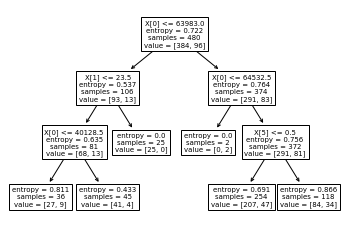

In [21]:
tree.plot_tree(model);

In [23]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [26]:
pd.crosstab(y_test,preds)

col_0,0
income,
0,92
1,28


In [27]:
#Accuracy
np.mean(preds==y_test)

0.7666666666666667

In [28]:
#Building decisiontree using Gini criteria
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [29]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
pred=model.predict(x_test)
np.mean(pred==y_test)

0.7666666666666667

[Text(181.35000000000002, 190.26, 'X[0] <= 63983.0\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(111.60000000000001, 135.9, 'X[0] <= 40128.5\ngini = 0.215\nsamples = 106\nvalue = [93, 13]'),
 Text(55.800000000000004, 81.53999999999999, 'X[0] <= 39660.0\ngini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.308\nsamples = 42\nvalue = [34, 8]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 81.53999999999999, 'X[8] <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(139.5, 27.180000000000007, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(195.3, 27.180000000000007, 'gini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 64532.5\ngini = 0.345\nsamples = 374\nvalue = [291, 83]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 81.53999999999999, 'X[5] <= 0.5\ngini = 0.341\nsamples = 372\nv

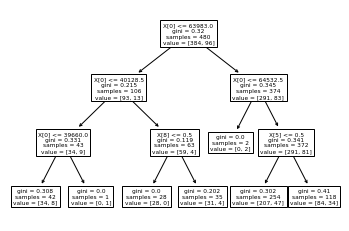

In [31]:
tree.plot_tree(model_gini)